|--- feature_4 <= 129.50
|   |--- feature_2 <= 26.30
|   |   |--- feature_2 <= 9.10
|   |   |   |--- feature_3 <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  28.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  26.30
|   |   |--- feature_3 <= 27.50
|   |   |   |--- feature_2 <= 45.40
|   |   |   |   |--- feature_5 <= 12.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  12.00
|   |   |   |   |   |--- feature_0 <= 7.00
|   |   |   |   |   |   |--- feature_6 <= 1.27
|   |   |   |   |   |   |   |--- feature_2 <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  30.95
|   |   |   |   |   |   |   |   |--- feature_5 <= 53.00
|

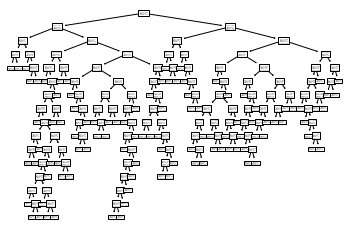

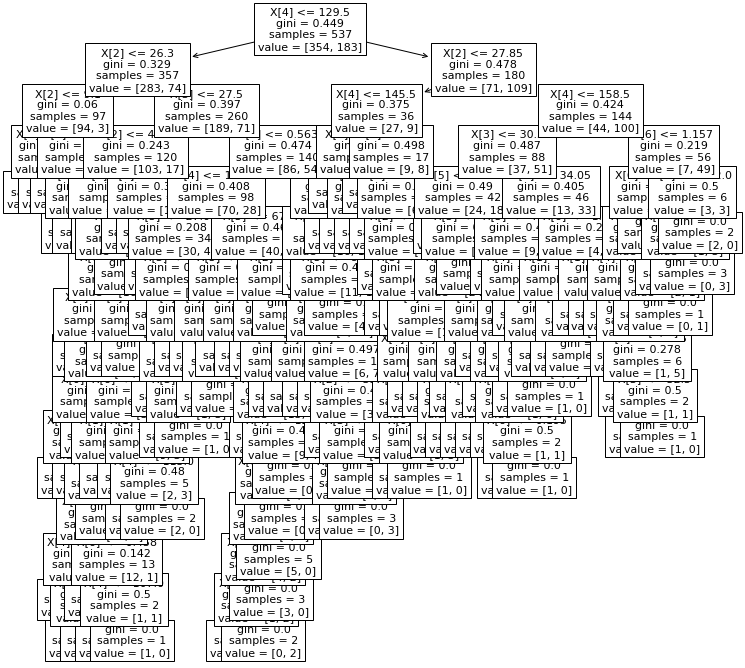

Accuracy: 0.6796536796536796
1.0 0.6796536796536796
[0.         0.00155183 0.00159617 0.00159617 0.00168485 0.00170701
 0.00171895 0.00173805 0.00176419 0.00184173 0.00199036 0.00203149
 0.00213623 0.00239425 0.00239603 0.00248293 0.00248293 0.00253936
 0.00260708 0.00270865 0.0027933  0.0027933  0.0027933  0.00288729
 0.00291802 0.00298748 0.00299761 0.00304159 0.00331057 0.00332274
 0.00338581 0.00341403 0.00351955 0.00357208 0.00362987 0.00377917
 0.00385348 0.00416478 0.00453757 0.00482841 0.00537657 0.00570325
 0.00583738 0.00611563 0.0061912  0.00643788 0.00682078 0.00732064
 0.01112616 0.01216636 0.01433312 0.0154276  0.02118767 0.07069409]


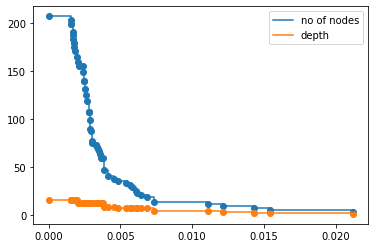

0.8342644320297952 0.7575757575757576


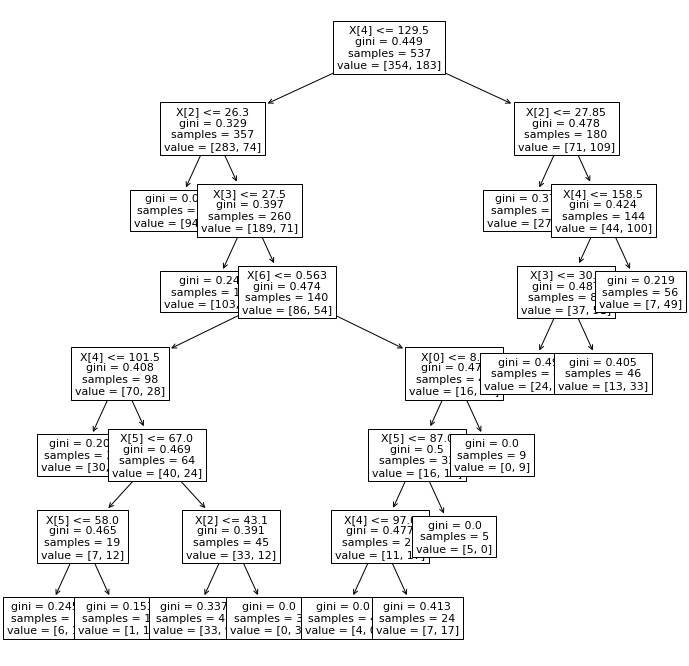

ModuleNotFoundError: No module named 'pydotplus'

In [2]:
#%% Decision Tree in Python


#Background: Decision trees work with boolean functions and pre-determined classifications of attributes
# to develop and algorithm that finds patterns to answer a "yes" or "no" question.


# Developing a Decision Tree - Prep your database


# Step 1. Import the necessary libraries.
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function


# Step 2. Load your data  and set the column names.
iv = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
url = "https://raw.githubusercontent.com/LeticiaGenao/Descision-Tree-in-Python/main/diabetes.csv"
df = pd.read_csv(url, index_col= False)
df.columns= iv

# Step 3. Assign columns to your independent and dependent variables
main_iv = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[main_iv] #Your feature or attributes (independent variables)
y = df.label #depdendent variable

# Step 4. Split your data into training and test sets. We're leaving 30% untouched as the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Developing a Decision Tree - building the model using scikit-learn
# Create a classifier object for the decision tree
dtc = DecisionTreeClassifier()

#Alternatively, you can choose the classifier in thr criterion section.
# Entropy is information gain, and the default is the gini index.
# You can also set the maximum depth of the tree to prevent overfitting.
# Example) dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)


# Use your train set on the classifier and fit.
dtc = dtc.fit(X_train,y_train)


#%%
#EVALUATION
from matplotlib import pyplot as plt
from sklearn import tree

# Printing Texts
# Exporting Decision Tree to the text version is helpful for explanations
texts = tree.export_text(dtc)
print(texts)

# Plotting a Tree with the plot_tree function
# Make sure matplotlib is installed. No need to export to graphviz first, if installed. 
tree.plot_tree(dtc)
plt.show()

# Plot tree - more readable.
plt.figure(figsize=(12,12))  # indicate plot size (set in inches)
tree.plot_tree(dtc, fontsize=11)
plt.show()

# Use a prediction on the test set.
y_pred = dtc.predict(X_test)

# Evaluate the predictive accuracy of your model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Decision Trees do not do any pruning thus the tree grows without any signal of when to stop.
# The accuracy scores function displays the train and test scores respectively for easy comparison.
# Our model is Overfitting as the train display a perfect 1 score, but a .69 for the test.
# In other words, our model is hitting the points on the train part with no errors, but is missing points in the test set not accounting for possible errors. - Pa
from sklearn.metrics import accuracy_score
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# Test the train and test against the pred variables to compare the accuracy scores.
print ( accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred) )


# Now that we know our tree is overfitting, we must prune and cut off branches.
# To prune the tree we must find the alpha levels and cut it off where the alphas start to level off.
# After pruning we can compare accuracies. This prevents overfitting and allows smaller less complex trees to be created.
# We use cost complexity pruning to find the right paramters for alpha.

# Get the alpha values
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# Next, we will attach our model to a list for each of our alphas.
dtcs = []
for ccp_alpha in ccp_alphas:
    dtc = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    dtcs.append(dtc)

# Now we develop an alpha plot to see where do the alphas level off and can use it in our
# decision tree classification.

# We will remove the last element in dtc and ccp_alphas,
# because it is the trivial tree with only one node. - Pa how do we know this?
dtcs = dtcs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [dtc.tree_.node_count for dtc in dtcs]
depth = [dtc.tree_.max_depth for dtc in dtcs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


# We can choose alpha = 0.006 as it seems like the most optimal choice.
# Rerun the model.
dtc = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006)
dtc = dtc.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# Test the train and test against the pred variables to compare the accuracy scores.
# The scores work are closer together a depict a more accurate realistic model.
print ( accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred) )

# To plot our new pruned tree, use the plot_tree function
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(dtc, fontsize=11)
plt.show()

# To plot a more visually appealing and color coded tree, and create a graphic image. 
# Use graphivix and StringI0 from sklearn.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = main_iv,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png') #Image sent to python project folder
Image(graph.create_png())

# Printing Texts
# Exporting Decision Tree to the text version is helpful for explanations
texts = tree.export_text(dtc)
print(texts)

#%%
# To find which features is the most important to use in your model, use a variable importance plot.
# It calculates which of the features is of most importance in your model in a bar graph. 
import numpy as np
importances = dtc.feature_importances_
# Set the bar graph to descending order of feature importance
indices = np.argsort(importances)[::-1]
# Match the sorted feature importances to their column names.
names = [df.columns[i] for i in indices]
# Create your plot
plt.figure()
# Create the title for your plot
plt.title("Feature Importance in Descending Order")
# Create the bars for your plot
plt.bar(range(X.shape[1]), importances[indices])
# Create your x-axis labels for your feature names
plt.xticks(range(X.shape[1]), names, rotation=90)
# Display the plot
plt.show()

